# Introduction

**Exploratory data analysis (EDA)** is useful to develop the essence of how our data can be and what kind of questions can be answered by them. The EDA is important because it allows the explorer to make critical decisions about what is interesting to follow and what is probably not worth following and thus construct a hypothesis using the relationships between the variables. EDA helps us to obtain information and to understand the correlation between independent variables and target variables.

#### Let's start with the analysis of the most important variable that is the SalePrice

In [19]:
import pandas as pd
import pandas as pd #
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# First we import our new train
train_path = r'./input/Train_Filtered.csv'
train = pd.read_csv(train_path)

We'll define a function to see how *SalesPrice* values are distributed. Ideally, data should be distributed normally, which means that all values are symmetrically distributed around the mean. This is important because we need to have the same amount of data to the left and right of the mean, otherwise the model will be forced to calculate with some points that are far away. This fact will generate non robust models.

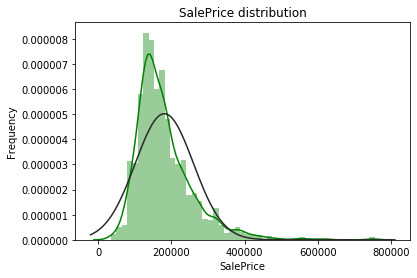

In [3]:
from scipy.stats import norm
# Distribution plot
def distribution_plot(data):
    sns.distplot(data, fit=norm, color='g',)
    plt.ylabel('Frequency')
    plt.title(f'{data.name} distribution')
    
distribution_plot(train['SalePrice'])

We can observe that the black curve is more deviated to the right, indicating that this distribution is positively skewed. As this will be our "answer" variable, it is recommended to fix this asymmetry in order to have better results. 

**So how do I fix the skewness?**
The best way to fix it is to perform a log transform of the same data, with the intent to reduce the skewness.

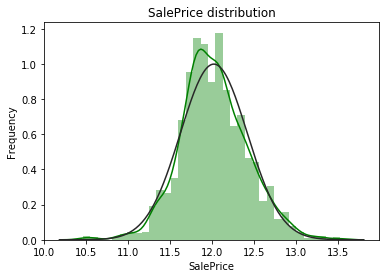

In [4]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

distribution_plot(train['SalePrice'])

**Dealing with Outliers**

Right now, we have corrected the skewness present on the response variable which is a really good point. Next step will be to visualise that variable and detect if we have *Outliers*. 

*Outliers* are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.

Text(0, 0.5, 'Sale Price')

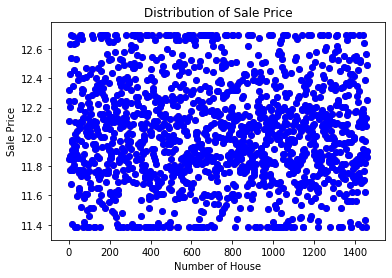

In [6]:
# Let's define an upper and lower limit based on the confidence level of 99%. The values that are located above this limit will be considered as 
# Outlier so let's remove them.
upperlimit = np.percentile(train.SalePrice.values, 95)
lowerlimit = np.percentile(train.SalePrice.values, 5)

# Raw values of houses are plotted in orange
plt.scatter(range(train.shape[0]), train["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Houses")
plt.ylabel("Sale Price");

train['SalePrice'].loc[train['SalePrice']>upperlimit] = upperlimit
train['SalePrice'].loc[train['SalePrice']<lowerlimit] = lowerlimit

# Corrected values, after removing the outliers

plt.scatter(range(train.shape[0]), train["SalePrice"].values,color='blue')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of House")
plt.ylabel("Sale Price")

Looking at this graph, we can see that the values in blue are those within the defined confidence interval (with the upper and lower limits). On the other hand, in orange we can see those that are outside and therefore are outliers. We have deleted them for a better accuracy.

In [7]:
train = train[train['SalePrice'] < upperlimit]
train = train[train['SalePrice'] > lowerlimit]

**How do I select the most important variables?**

Right now, we have deleted some Outliers and our dataset looks really nice. But we still have 77 variables, let's make our life more simpler!

In [8]:
print ("Size of train data : {}" .format(train.shape))

Size of train data : (1312, 77)


One way to select the most important variables is by correlating them with the predicted variable. In our case, it is the *SalePrice*. Correlation can be positive or negative, indicating a positive or negative correlation between both of the variables. The closer the correlation value is to 1 or -1, the greater the correlation and therefore the greater the importance for describing the information.

In [11]:
# Let's calculate the correlation value of each variable with the response (SalesPrice)
corr = train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.765341
GrLivArea        0.620114
GarageCars       0.607334
GarageArea       0.577312
FullBath         0.569294
YearBuilt        0.564425
YearRemodAdd     0.533163
TotalBsmtSF      0.513573
GarageYrBlt      0.504940
1stFlrSF         0.482713
TotRmsAbvGrd     0.426422
Fireplaces       0.425030
MasVnrArea       0.322959
OpenPorchSF      0.314905
LotFrontage      0.297397
2ndFlrSF         0.288370
WoodDeckSF       0.286848
HalfBath         0.279145
BsmtFinSF1       0.240550
LotArea          0.232588
BsmtUnfSF        0.229994
BsmtFullBath     0.168934
BedroomAbvGr     0.150399
ScreenPorch      0.106810
MoSold           0.072139
PoolArea         0.052074
3SsnPorch        0.047722
BsmtFinSF2       0.011824
MiscVal          0.000656
YrSold          -0.021440
Unnamed: 0      -0.027333
BsmtHalfBath    -0.029987
MSSubClass      -0.055615
LowQualFinSF    -0.057361
OverallCond     -0.131260
EnclosedPorch   -0.136552
KitchenAbvGr    -0.176847
Name: SalePr

There is another way to have a look at the correlation between variables, having a look at the correlation matrix. This approach represents the correlation between variables in a 2 dimensional plot and it can be more intutitive. For a better understanding, only the variables with a correlation coefficient greater than 0.50 are analysed ("SalePrice","OverallQual","GrLivArea","GarageCars""GarageArea","GarageYrBlt","TotalBsmtSF","FullBath","TotRmsAbvGrd","YearBuilt" and "YearRemodAdd")

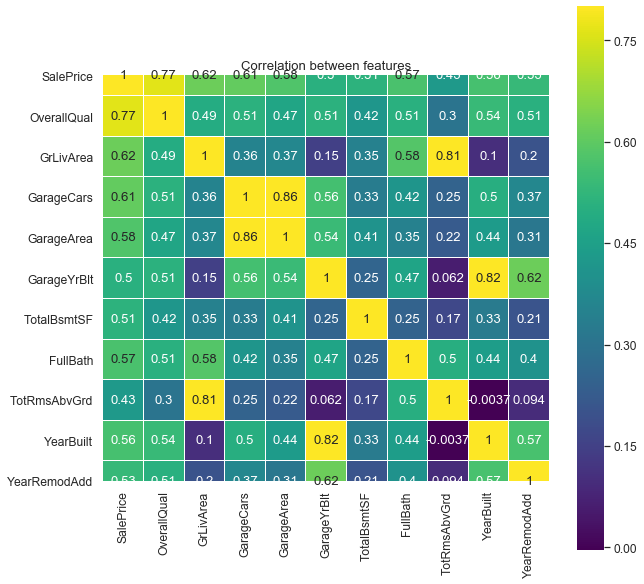

In [14]:
corrMatrix = train[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()


sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In this plot, we can observe that all variables are distributed over the horizontal (x-axis) and vertical (y-axis). The value that is represented is the correlation value, which was described in the previous section. We can find some diagonal values of ones, which correspond to the correlation of a variable with itself. One variable is strongly correlated by itself that is why we can observe a 1value.

If we have a look at the correlation coefficient, we can observe two groups: those that have a correlation greater than 0.5 with respect to the SalePrice. These variables are: *OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, FullBath, TotRmsAbvGrd, YearBuilt and YearRemodAdd*. These can be important features for predicting the selling price.

In the second group we see those that have very little correlation: *EnclosedPorch* and *KitchenAbvGr*.

**How can we select the most important ones?**

At that point, it is time to select the most important variables so that the ones with a high correlation with the response variable (SalePrice). We will select the important variables taking into account their correlation value, being equal or higher than 0.6.

In [15]:
train_corr = train.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
important_list = train_corr[abs(train_corr) >= 0.6].sort_values(ascending=False)
non_important_list = pd.DataFrame(train_corr[abs(train_corr) < 0.6].sort_values(ascending=False))

print("There are {} strongly correlated variables with SalePrice:\n{}".format(len(important_list), important_list))

There are 3 strongly correlated variables with SalePrice:
OverallQual    0.765341
GrLivArea      0.620114
GarageCars     0.607334
Name: SalePrice, dtype: float64


In [16]:
important_list = ['SalePrice', 'OverallQual','GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF','FullBath']
train = train[important_list]
train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath
0,12.247699,7,1710,2,548,856,2
1,12.109016,6,1262,2,460,1262,2
2,12.317171,7,1786,2,608,920,2
3,11.849405,7,1717,3,642,756,1
4,12.429220,8,2198,3,836,1145,2


**Missing data**

Missing data are defined as values that are not available in our dataset and that might be significant. They can be anything from missing sequence, incomplete feature, missing files, incomplete information, data entry error, etc. Unfortunately, most real-world datasets contain missing data that is why is important to understand them. Data with missing data fields cannot be used because the mathematical models do not know how to deal with them, so it is necessary to transform these fields so that they can be used for analysis and modelling.

Having missing values in the data is not necessarily a setback, but it is an opportunity to perform the correct feature engineering to guide the model in interpreting the missing information in the correct way.


Let's describe some important questions when thinking about missing data:

* What is the prevalence of missing data?
* Are the missing data random or do they have a pattern?

It is important to know the answer to these questions as lack of information can lead to a reduction in sample size and consequently prevent us from continuing with the analysis. In addition, from a substantive point of view, we must ensure that the process of missing data is unbiased and conceals an uncomfortable truth.

So, let's make some analysis to detect them.

In [17]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
FullBath,0,0.0
TotalBsmtSF,0,0.0
GarageArea,0,0.0
GarageCars,0,0.0
GrLivArea,0,0.0
OverallQual,0,0.0
SalePrice,0,0.0


As you can see above, none of our selected variables have missing values. That's a really good thing and means that our Exploratory Data Analysis is over. If you are interested in knowing how to approach a dataset with missing values, you can find more information in the **Appendix, section 1.**

Newly, le'ts save our train dataset for further steps

In [18]:
# Save our filtered dataset:
# path = r'./input/'
# os.chdir(path)
train.to_csv('Train_Filtered_step2.csv')

Now that we already know our dataset it is time to go further and start the *3. Model Building*. 